# **Libraries**

In [31]:
import glob
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Pre-Processing**

In [32]:
true_col_name = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
                 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
                 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
                 'RainTomorrow']

# define to change wrong column name
col_name = ['date', 'location', 'mintemp', 'maxtemp', 'rainfall',
            'evaporation', 'sunshine', 'windgustdir', 'windgustspeed',
            'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm',
            'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
            'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
            'raintomorrow']

In [33]:
# read all csv files
addresses = []
addresses = glob.glob('*.csv')

In [34]:
# identify unique columns name
col_names = []

for address in addresses:
    a = pd.read_csv(address)
    col_names = col_names + list(a.columns.values)


set(col_names)

{'Cloud 3 pm',
 'Cloud 9 am',
 'Cloud.3.pm',
 'Cloud.9.am',
 'Cloud3pm',
 'Cloud9am',
 'Cloud_3_pm',
 'Cloud_9_am',
 'Date',
 'Evaporation',
 'Humidity 3 pm',
 'Humidity 9 am',
 'Humidity.3.pm',
 'Humidity.9.am',
 'Humidity3pm',
 'Humidity9am',
 'Humidity_3_pm',
 'Humidity_9_am',
 'Location',
 'Max Temp F',
 'Max.Temp.C',
 'Max.Temp.F',
 'MaxTempC',
 'MaxTempF',
 'Max_Temp_C',
 'Max_Temp_F',
 'Min Temp F',
 'Min.Temp.C',
 'Min.Temp.F',
 'MinTempC',
 'MinTempF',
 'Min_Temp_C',
 'Min_Temp_F',
 'Pressure 3 pm',
 'Pressure 9 am',
 'Pressure.3.pm',
 'Pressure.9.am',
 'Pressure3pm',
 'Pressure9am',
 'Pressure_3_pm',
 'Pressure_9_am',
 'Rain Today',
 'Rain Tomorrow',
 'Rain.Today',
 'Rain.Tomorrow',
 'RainToday',
 'RainTomorrow',
 'Rain_Today',
 'Rain_Tomorrow',
 'Rainfall',
 'Sunshine',
 'Temp 3 pm F',
 'Temp 9 am F',
 'Temp.3.pm.C',
 'Temp.3.pm.F',
 'Temp.9.am.C',
 'Temp.9.am.F',
 'Temp3pmC',
 'Temp3pmF',
 'Temp9amC',
 'Temp9amF',
 'Temp_3_pm_C',
 'Temp_3_pm_F',
 'Temp_9_am_C',
 'Temp_9_am_

In [35]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# change column name to true column name and merge all csv files to a df
address = 0
mer_df = pd.DataFrame(columns=[true_col_name])

# iterate over each csv file
for address in addresses:
    p_df = pd.read_csv(address)
    p_df.columns = p_df.columns.str.replace(' ', '').str.replace('.', '').str.replace('_', '').str.lower()

    p_df.iloc[:, p_df.columns.str.endswith('f')] = 5/9 * (p_df.iloc[:, p_df.columns.str.endswith('f')] - 32)
    p_df.columns = p_df.columns.str.replace(r'(.+)f$', r'\1', regex=True)
    p_df.columns = p_df.columns.str.replace(r'(.+)c$', r'\1', regex=True)

    p_df = p_df.reindex(columns=col_name)
    p_df.columns = true_col_name
    mer_df = p_df.append(mer_df)

In [685]:
# remove unsable columns
df = mer_df.iloc[:, :-23]

# show 5 first row of df
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,No,No
1,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,No,No
2,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,No,No
3,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,No,No
4,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,No,No


In [686]:
#reset index of merged df
df = df.reset_index(drop=True)

In [687]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,No,No
1,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,No,No
2,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,No,No
3,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,No,No
4,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,MelbourneAirport,7.7,13.2,0.2,0.6,0.0,N,37.0,W,...,97.0,78.0,1029.1,1028.6,7.0,7.0,10.1,11.8,No,No
145456,2017-06-22,MelbourneAirport,2.4,13.0,0.0,0.6,0.0,N,39.0,N,...,78.0,60.0,1028.6,1025.0,7.0,7.0,7.4,12.9,No,No
145457,2017-06-23,MelbourneAirport,5.5,13.2,0.0,1.6,6.0,N,57.0,NNW,...,68.0,66.0,1018.7,1014.0,1.0,7.0,9.6,11.2,No,Yes
145458,2017-06-24,MelbourneAirport,5.7,12.6,1.2,1.8,5.6,SW,33.0,W,...,80.0,50.0,1018.9,1017.5,2.0,7.0,8.0,11.2,Yes,No


In [688]:
# show type of each column
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [689]:
# round values of columns containing 'Temp'
temp_columns = [col for col in df.columns if 'Temp' in col]
df[temp_columns] = df[temp_columns].round(0)

In [690]:
# show ram usage of the df
ram_usage = df.memory_usage(deep=True).sum()

In [691]:
# show dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [692]:
# change some colunn type to categorical value
df = df.astype({"Location":'category', "WindGustDir":'category',
                "WindDir9am":'category', "WindDir3pm":'category',
                "RainToday":'category', "RainTomorrow":'category'})

In [693]:
# show ram usage diffrent in categorical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           145460 non-null  object  
 1   Location       145460 non-null  category
 2   MinTemp        143975 non-null  float64 
 3   MaxTemp        144199 non-null  float64 
 4   Rainfall       142199 non-null  float64 
 5   Evaporation    82670 non-null   float64 
 6   Sunshine       75625 non-null   float64 
 7   WindGustDir    135134 non-null  category
 8   WindGustSpeed  135197 non-null  float64 
 9   WindDir9am     134894 non-null  category
 10  WindDir3pm     141232 non-null  category
 11  WindSpeed9am   143693 non-null  float64 
 12  WindSpeed3pm   142398 non-null  float64 
 13  Humidity9am    142806 non-null  float64 
 14  Humidity3pm    140953 non-null  float64 
 15  Pressure9am    130395 non-null  float64 
 16  Pressure3pm    130432 non-null  float64 
 17  Cloud9am  

In [694]:
# count NaN values of each column
nan_counts = df.isna().sum()

In [695]:
nan_counts

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [696]:
# handle NaN value

for column in df.columns:
    if nan_counts[column] < 10000:
        # drop rows containing NaN values
        df = df.dropna(subset=[column])

        # fill NaN values with mode of present values in the column

    else:
        try:
            df[column] = df[column].fillna(df[column].mean()[0])

        except Exception:
            df[column] = df[column].fillna(df[column].mode()[0])
        if column == 'WindGustDir' or column == 'WindDir9am':
            df[column] = df[column].fillna(df[column].mode()[0])

In [697]:
# shows changes of df size
df.shape

(134590, 23)

In [698]:
# check NaN values
nan_counts = df.isna().sum()
nan_counts

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [699]:
# Set the outlier detection threshold
threshold = 5
# iterate over each column in the df
for column in df.columns:
    if df[column].dtype == np.float64:
        # calculate the quartiles (Q1 and Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # calculate the IQR and outlier range
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # identify the rows containing outliers

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # drop the outliers from the df
        df.drop(outliers.index, inplace=True)

In [700]:
# show changes of the df size
df.shape

(113834, 23)

In [701]:
# show final df
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,WaggaWagga,10.0,28.0,0.0,9.8,13.5,WNW,59.0,NW,...,37.0,24.0,1005.2,1003.5,1.0,1.0,21.0,27.0,No,No
2,2009-01-03,WaggaWagga,11.0,31.0,0.0,9.8,13.7,NE,39.0,ENE,...,43.0,18.0,1017.8,1014.3,0.0,1.0,19.0,28.0,No,No
3,2009-01-04,WaggaWagga,15.0,35.0,0.0,9.4,12.1,N,39.0,NE,...,46.0,19.0,1014.8,1010.6,1.0,4.0,25.0,34.0,No,No
4,2009-01-05,WaggaWagga,12.0,36.0,0.0,11.6,13.4,W,43.0,NNE,...,23.0,5.0,1013.1,1009.8,1.0,1.0,24.0,35.0,No,No
5,2009-01-06,WaggaWagga,12.0,39.0,0.0,13.0,13.6,SW,72.0,NE,...,23.0,3.0,1011.4,1007.4,0.0,0.0,26.0,37.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,MelbourneAirport,8.0,13.0,0.2,0.6,0.0,N,37.0,W,...,97.0,78.0,1029.1,1028.6,7.0,7.0,10.0,12.0,No,No
145456,2017-06-22,MelbourneAirport,2.0,13.0,0.0,0.6,0.0,N,39.0,N,...,78.0,60.0,1028.6,1025.0,7.0,7.0,7.0,13.0,No,No
145457,2017-06-23,MelbourneAirport,5.0,13.0,0.0,1.6,6.0,N,57.0,NNW,...,68.0,66.0,1018.7,1014.0,1.0,7.0,10.0,11.0,No,Yes
145458,2017-06-24,MelbourneAirport,6.0,13.0,1.2,1.8,5.6,SW,33.0,W,...,80.0,50.0,1018.9,1017.5,2.0,7.0,8.0,11.0,Yes,No


In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113834 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           113834 non-null  object  
 1   Location       113834 non-null  category
 2   MinTemp        113834 non-null  float64 
 3   MaxTemp        113834 non-null  float64 
 4   Rainfall       113834 non-null  float64 
 5   Evaporation    113834 non-null  float64 
 6   Sunshine       113834 non-null  float64 
 7   WindGustDir    113834 non-null  category
 8   WindGustSpeed  113834 non-null  float64 
 9   WindDir9am     113834 non-null  category
 10  WindDir3pm     113834 non-null  category
 11  WindSpeed9am   113834 non-null  float64 
 12  WindSpeed3pm   113834 non-null  float64 
 13  Humidity9am    113834 non-null  float64 
 14  Humidity3pm    113834 non-null  float64 
 15  Pressure9am    113834 non-null  float64 
 16  Pressure3pm    113834 non-null  float64 
 17  Cloud9am  

# **Plotting**

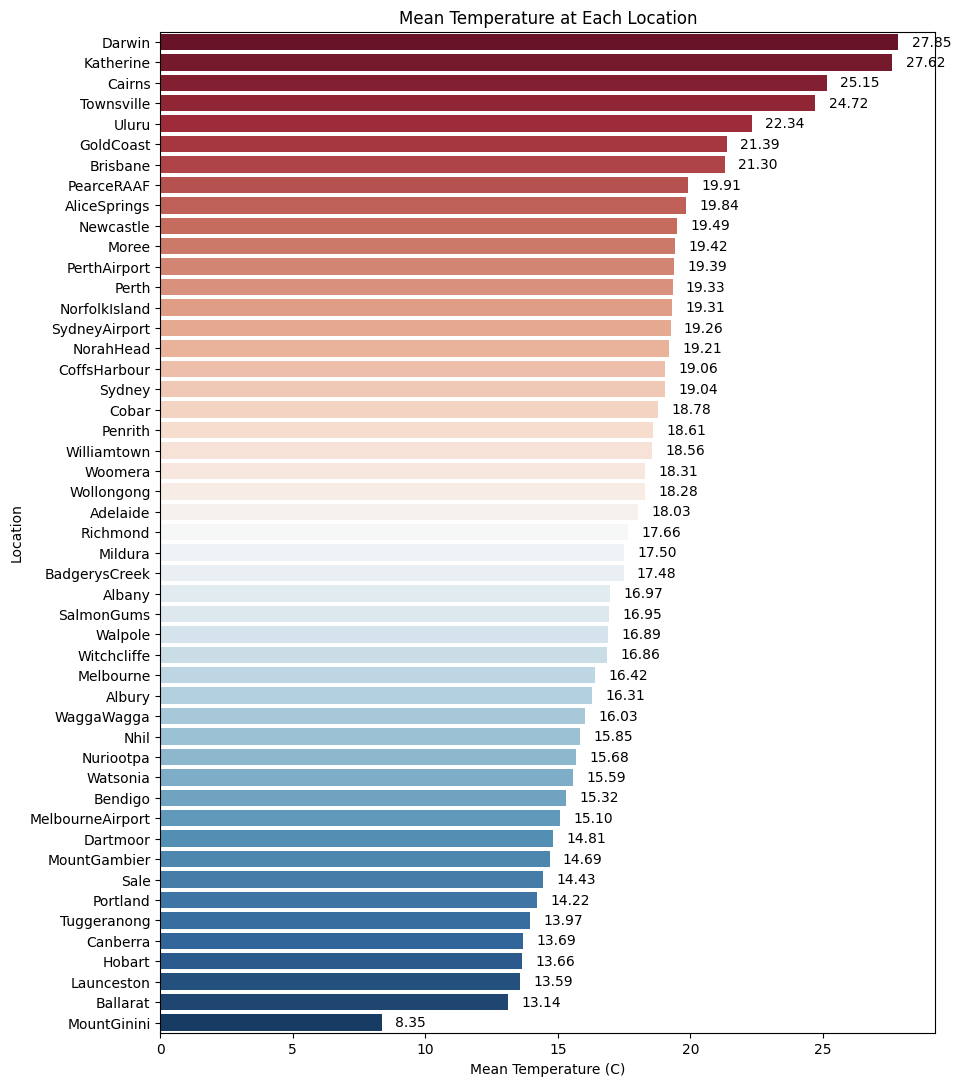

In [703]:
# calculate mean of temprature features for each location
mean_temp_df = df.groupby('Location')['MaxTemp', 'MinTemp'].mean().reset_index()

#calculate mean of MinTemp and MaxTemp
mean_temp_df['mean_temp'] = (mean_temp_df['MaxTemp'] + mean_temp_df['MinTemp']) / 2

# sort dataframe descending
mean_temp_df = mean_temp_df.sort_values('mean_temp', ascending=False)

# plot bar chart
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='mean_temp', y='Location', data=mean_temp_df, order=mean_temp_df['Location'], palette='RdBu')
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Location')
plt.title('Mean Temperature at Each Location')

# Add text annotations to the bars
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{mean_temp_df["mean_temp"].iloc[i]:.2f}', ha='left', va='center')

plt.show()

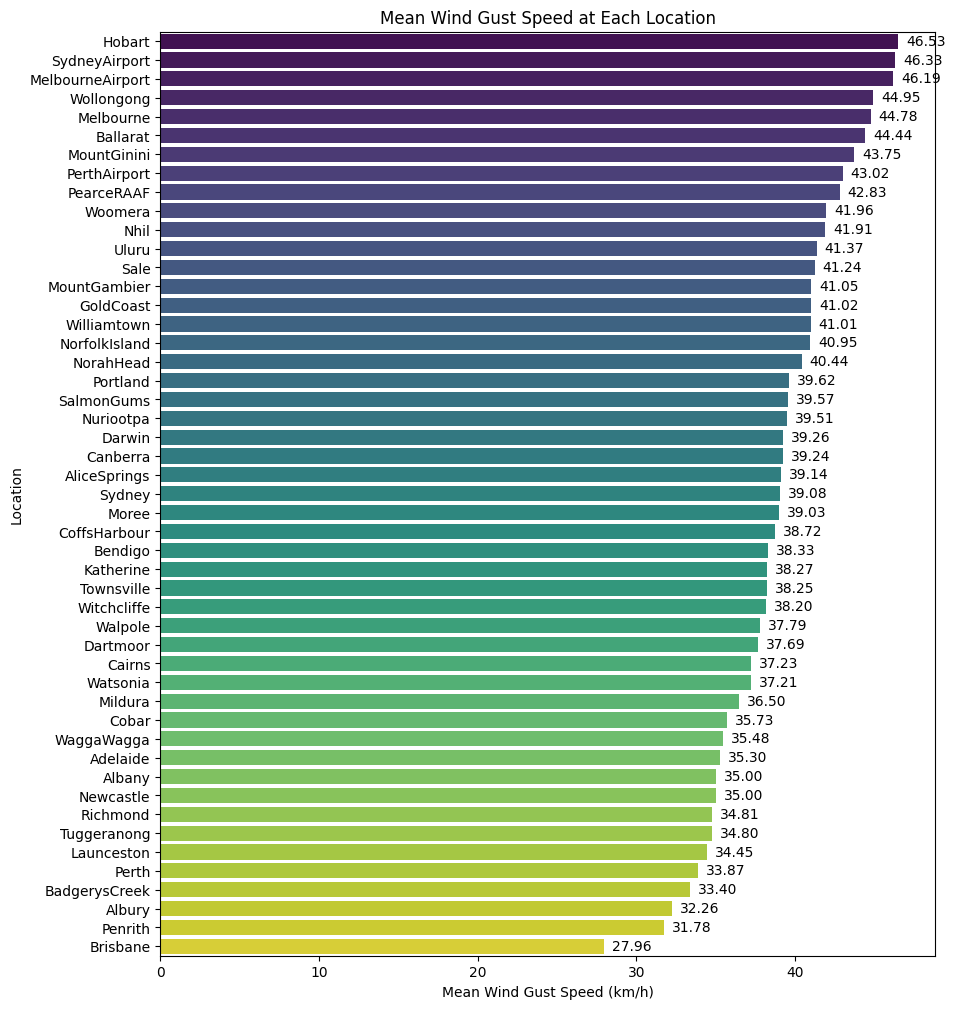

In [704]:
# calculate mean of wind speed gust feature for each location
mean_wind_speed_df = df.groupby('Location')['WindGustSpeed'].mean().reset_index()

# sort df descending WindGustSpeed
mean_wind_speed_df = mean_wind_speed_df.sort_values('WindGustSpeed', ascending=False)

# plot bar chart descending
plt.figure(figsize=(10, 12))
ax = sns.barplot(x='WindGustSpeed', y='Location', data=mean_wind_speed_df, order=mean_wind_speed_df['Location'], palette='viridis')
plt.xlabel('Mean Wind Gust Speed (km/h)')
plt.ylabel('Location')
plt.title('Mean Wind Gust Speed at Each Location')

# add text annotations to the bars
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{mean_wind_speed_df["WindGustSpeed"].iloc[i]:.2f}', ha='left', va='center')

plt.show()

In [705]:
# calculate MeanTemp
df['MeanTemp'] = (df['MinTemp'] + df['MaxTemp']) / 2
no_sunshine_df = df[df['Sunshine'] != 0]

# calculate correlation between Sunshine and MeanTemp
correlation = no_sunshine_df['Sunshine'].corr(no_sunshine_df['MeanTemp'])
print("Correlation between Sunshine and MeanTemp:", correlation)

Correlation between Sunshine and MeanTemp: 0.32122639082315396


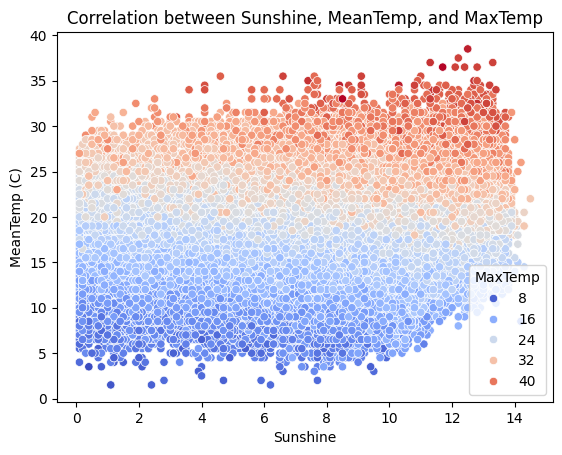

In [706]:
# plot scatter plot
sns.scatterplot(x='Sunshine', y='MeanTemp', hue='MaxTemp', data=no_sunshine_df, palette='coolwarm')
plt.xlabel('Sunshine')
plt.ylabel('MeanTemp (C)')
plt.title('Correlation between Sunshine, MeanTemp, and MaxTemp')
plt.show()

In [707]:
df = df.drop('MeanTemp', axis=1)

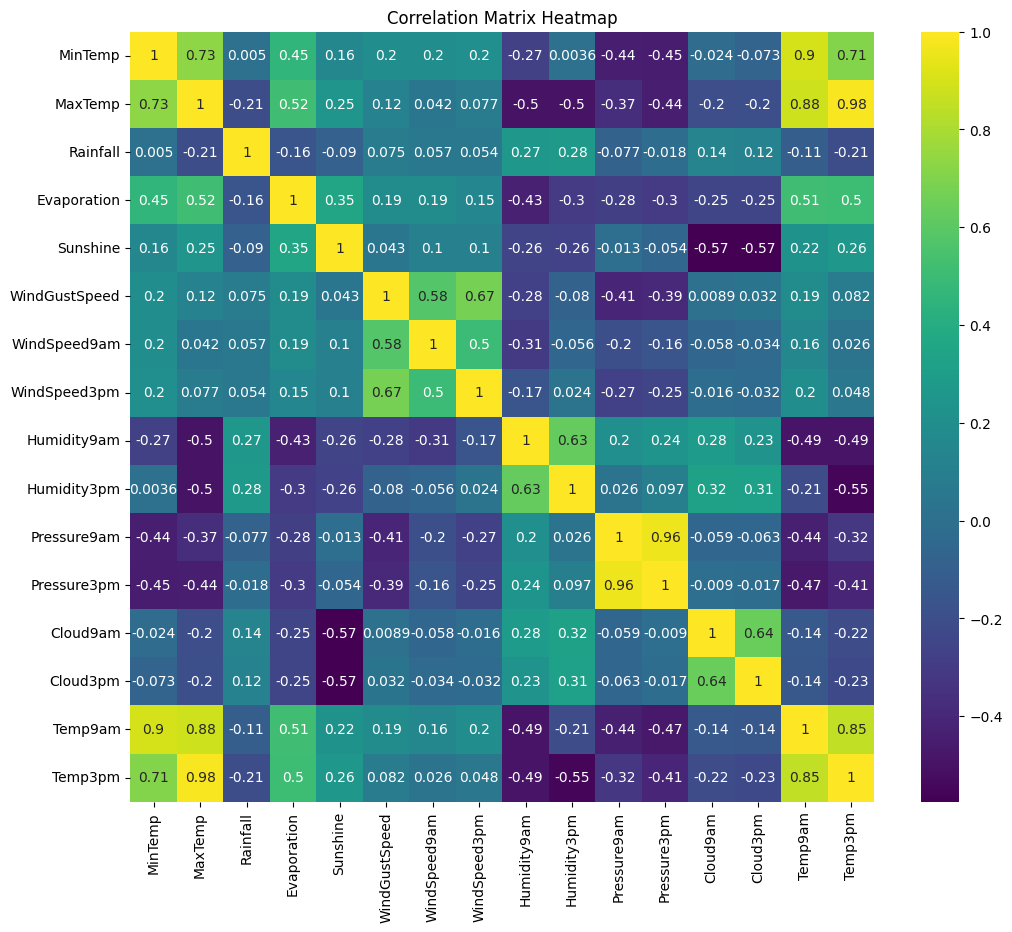

In [708]:
# plot heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

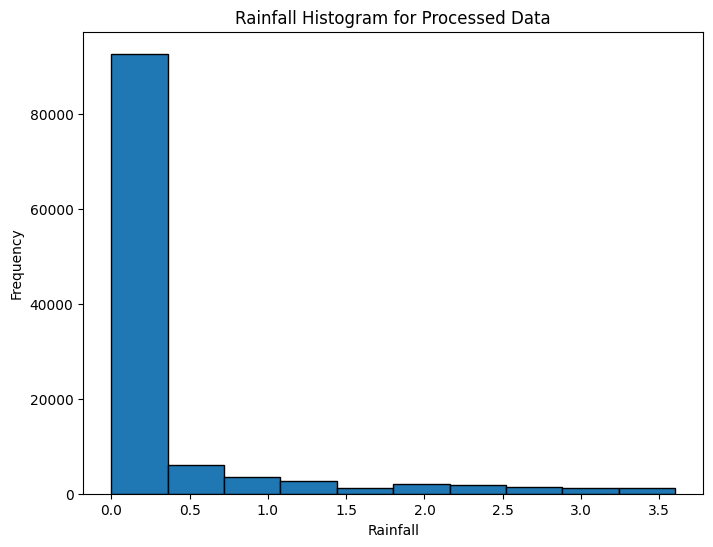

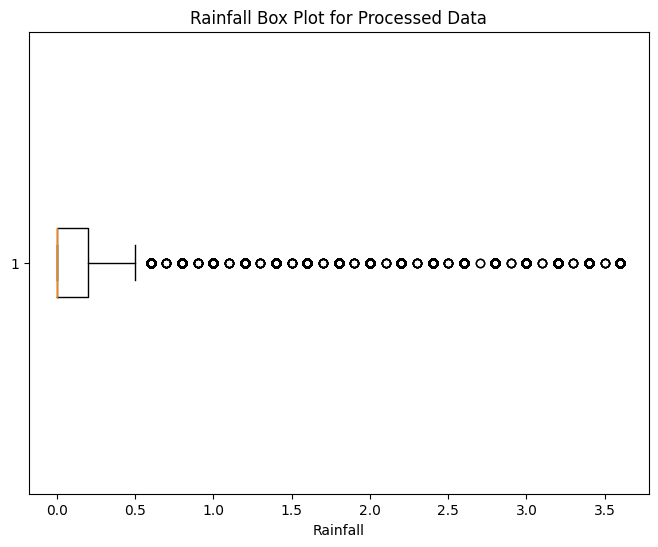

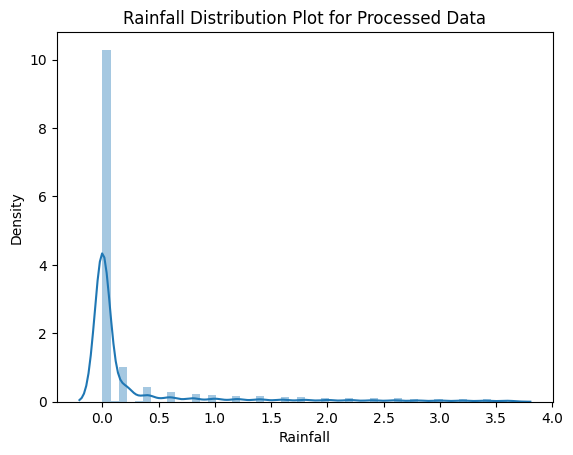

In [709]:
# plot box plot, hsitogram and dist plot by processed data (df)

# Select the 'Rainfall' column
rainfall_data = df['Rainfall']

# plot histogram
plt.figure(figsize=(8, 6))
plt.hist(rainfall_data, bins=10, edgecolor='black')
plt.title('Rainfall Histogram for Processed Data')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

# plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(rainfall_data, vert=False)
plt.title('Rainfall Box Plot for Processed Data')
plt.xlabel('Rainfall')
plt.show()

# plot distribution
warnings.simplefilter(action='ignore', category=UserWarning)
sns.distplot(rainfall_data)
plt.title('Rainfall Distribution Plot for Processed Data')
plt.xlabel('Rainfall')
plt.ylabel('Density')
plt.show()

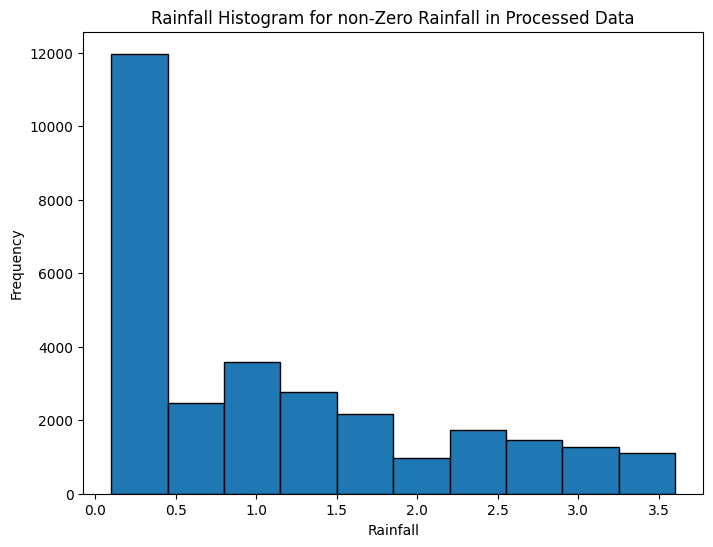

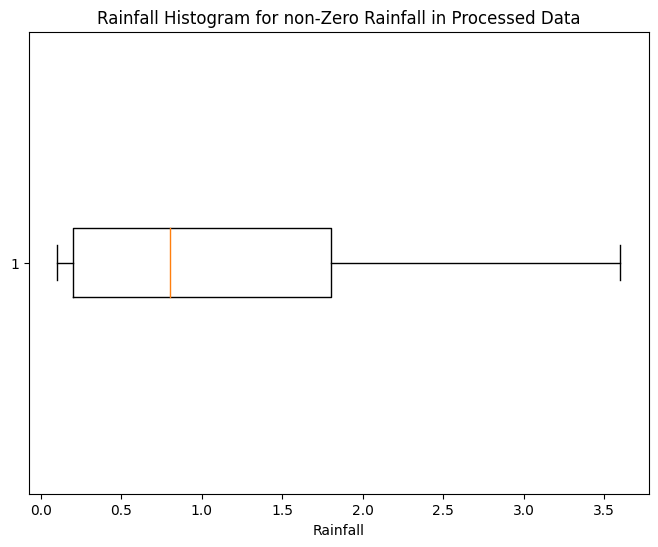

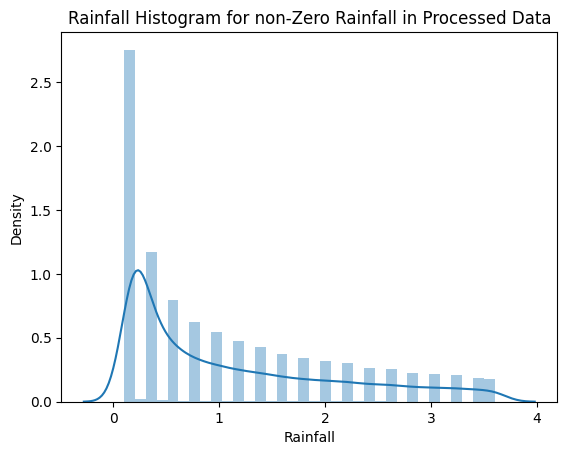

In [711]:
# remove zero rainfall from non-processed data
z_rainfall = df[df['Rainfall'] != 0]
rainfall_data = z_rainfall['Rainfall']

# plot histogram
plt.figure(figsize=(8, 6))
plt.hist(rainfall_data, bins=10, edgecolor='black')
plt.title('Rainfall Histogram for non-Zero Rainfall in Processed Data')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

# plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(rainfall_data, vert=False)
plt.title('Rainfall Histogram for non-Zero Rainfall in Processed Data')
plt.xlabel('Rainfall')
plt.show()

# plot distribution
warnings.simplefilter(action='ignore', category=UserWarning)
sns.distplot(rainfall_data)
plt.title('Rainfall Histogram for non-Zero Rainfall in non-Processed Data')
plt.xlabel('Rainfall')
plt.ylabel('Density')
plt.show()

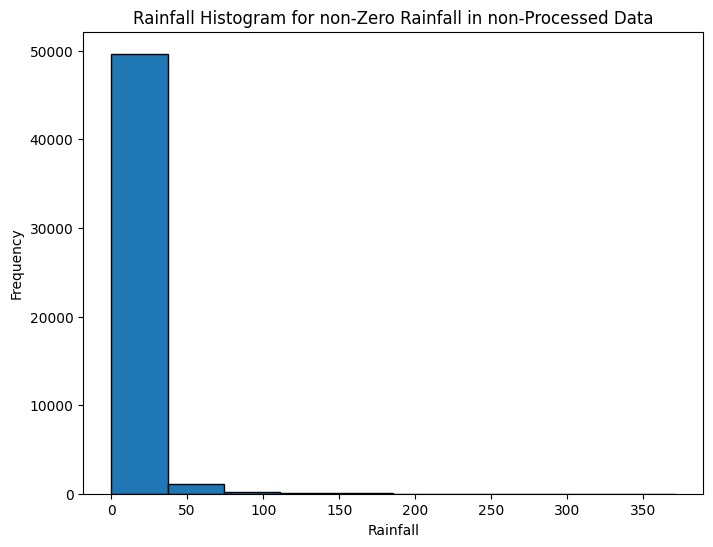

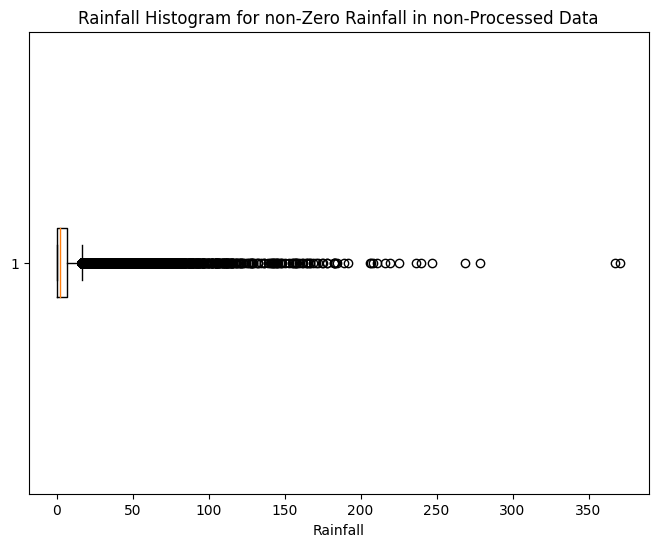

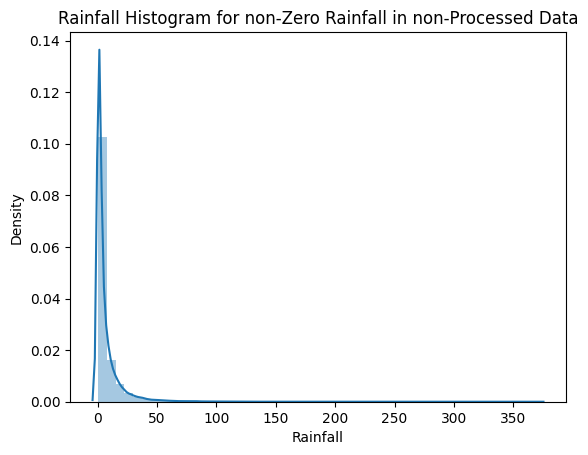

In [712]:
# remove zero rainfall from non-processed data
rainfall_df = mer_df['Rainfall']
true_rainfall = rainfall_df[mer_df['Rainfall'] != 0]
true_rainfall = true_rainfall.dropna()

# plot histogram
plt.figure(figsize=(8, 6))
plt.hist(true_rainfall, bins=10, edgecolor='black')
plt.title('Rainfall Histogram for non-Zero Rainfall in non-Processed Data')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

# plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(true_rainfall, vert=False)
plt.title('Rainfall Histogram for non-Zero Rainfall in non-Processed Data')
plt.xlabel('Rainfall')
plt.show()

# plot distribution
warnings.simplefilter(action='ignore', category=UserWarning)
sns.distplot(true_rainfall)
plt.title('Rainfall Histogram for non-Zero Rainfall in non-Processed Data')
plt.xlabel('Rainfall')
plt.ylabel('Density')
plt.show()

In [713]:
# remove first and last %5 of non-processed data
z1 = true_rainfall.quantile(0.05)
z2 = true_rainfall.quantile(0.95)
t_rainfall_outlier = true_rainfall[(true_rainfall < z1) | (true_rainfall > z2)]
true_rainfall.drop(t_rainfall_outlier.index, inplace=True)

In [714]:
true_rainfall.shape

(23152,)

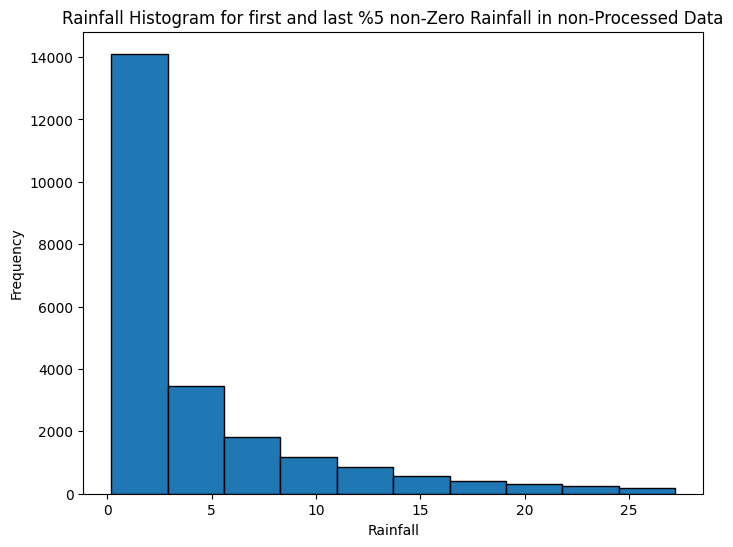

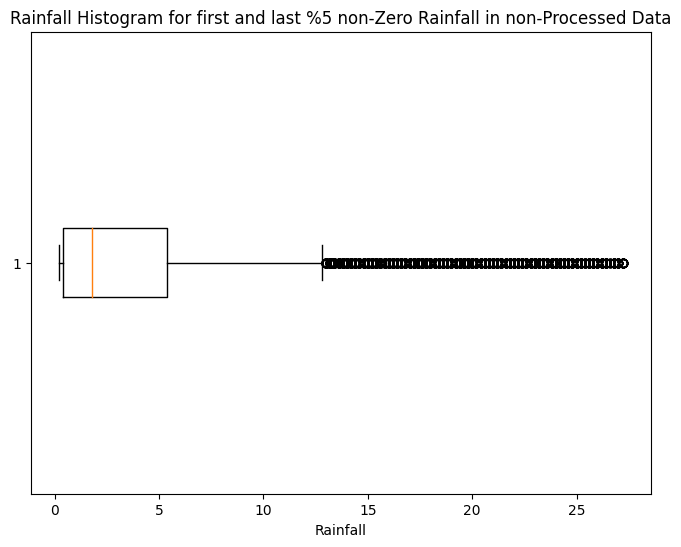

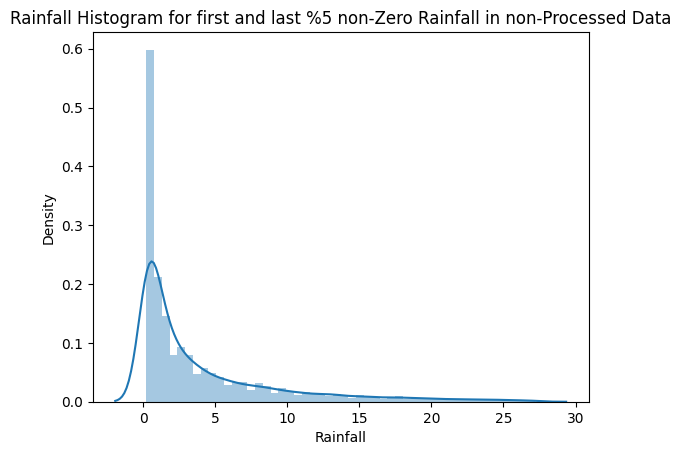

In [715]:
# plot histogram
plt.figure(figsize=(8, 6))
plt.hist(true_rainfall, bins=10, edgecolor='black')
plt.title('Rainfall Histogram for first and last %5 non-Zero Rainfall in non-Processed Data')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

# plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(true_rainfall, vert=False)
plt.title('Rainfall Histogram for first and last %5 non-Zero Rainfall in non-Processed Data')
plt.xlabel('Rainfall')
plt.show()

# plot distribution
warnings.simplefilter(action='ignore', category=UserWarning)
sns.distplot(true_rainfall)
plt.title('Rainfall Histogram for first and last %5 non-Zero Rainfall in non-Processed Data')
plt.xlabel('Rainfall')
plt.ylabel('Density')
plt.show()

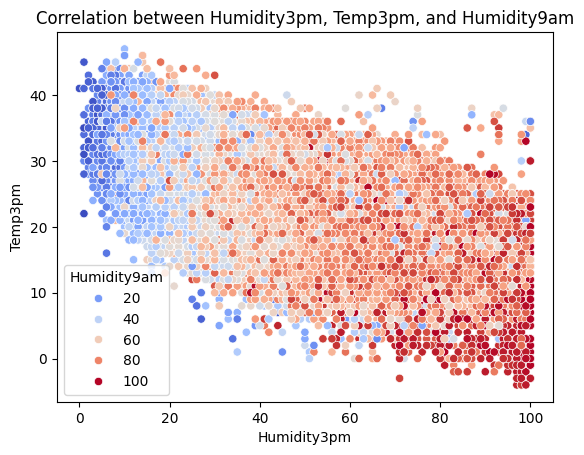

In [716]:
sns.scatterplot(x='Humidity3pm', y='Temp3pm', hue='Humidity9am', data=df, palette='coolwarm')
plt.xlabel('Humidity3pm')
plt.ylabel('Temp3pm')
plt.title('Correlation between Humidity3pm, Temp3pm, and Humidity9am')
plt.show()

<ipython-input-717-62b4016a9211>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


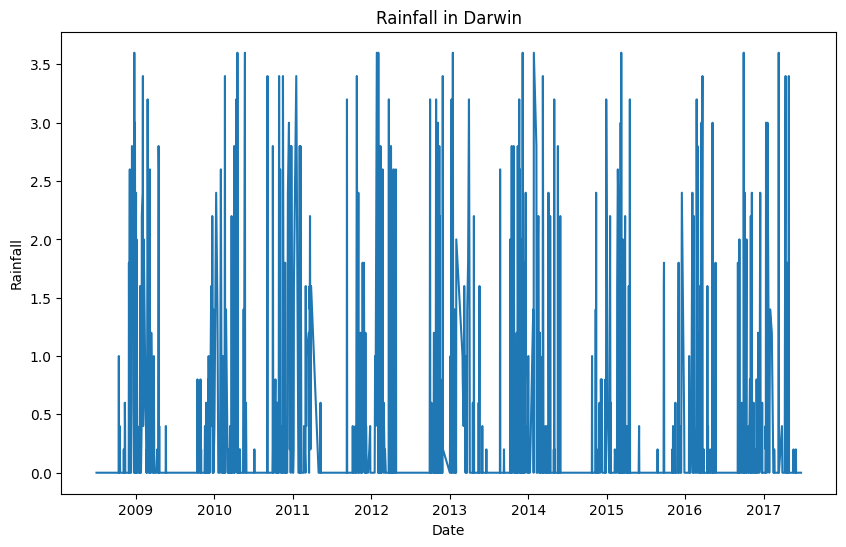

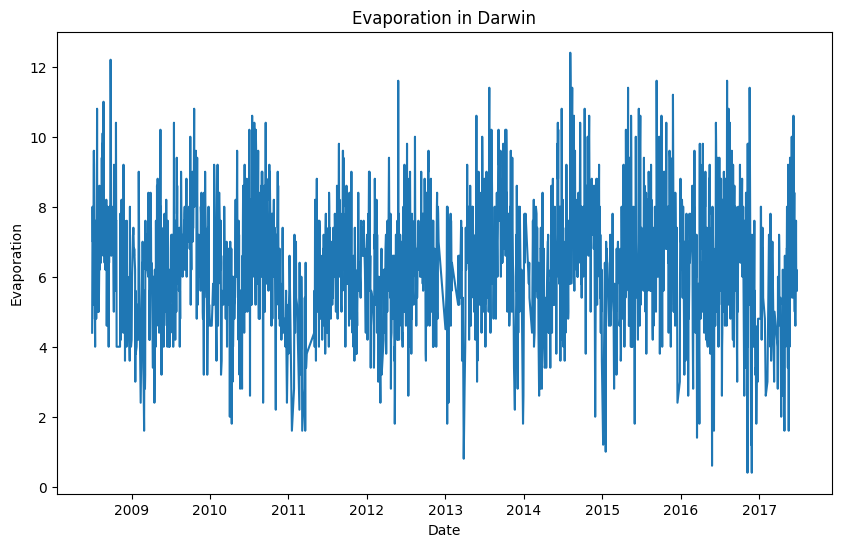

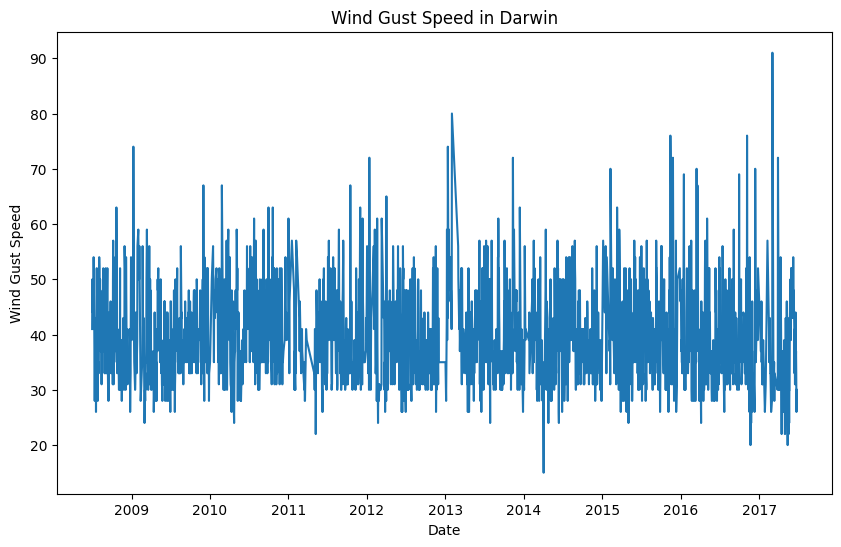

In [717]:
# filter the dataframe for a specific location
location = 'Darwin'
filtered_df = df[df['Location'] == location]

# convert the 'Date' column to datetime type
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# set the 'Date' column as the index
filtered_df.set_index('Date', inplace=True)

# plot Rainfall
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['Rainfall'])
plt.title('Rainfall in {}'.format(location))
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()

# plot Evaporation
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['Evaporation'])
plt.title('Evaporation in {}'.format(location))
plt.xlabel('Date')
plt.ylabel('Evaporation')
plt.show()

# plot WindGustSpeed
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['WindGustSpeed'])
plt.title('Wind Gust Speed in {}'.format(location))
plt.xlabel('Date')
plt.ylabel('Wind Gust Speed')
plt.show()

<ipython-input-718-011ff30cf67f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


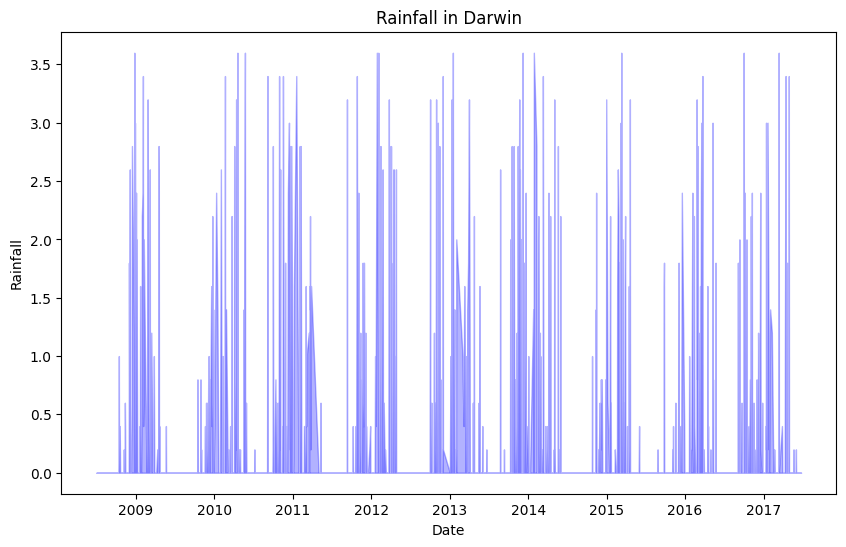

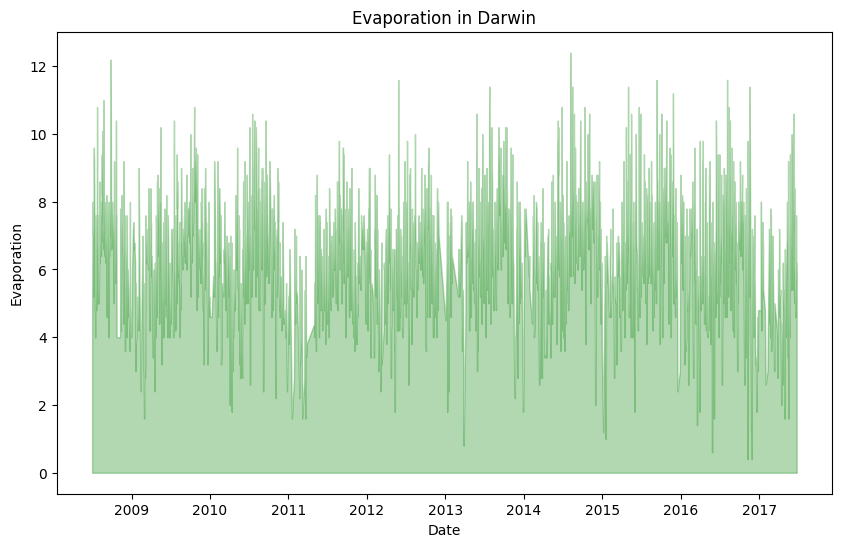

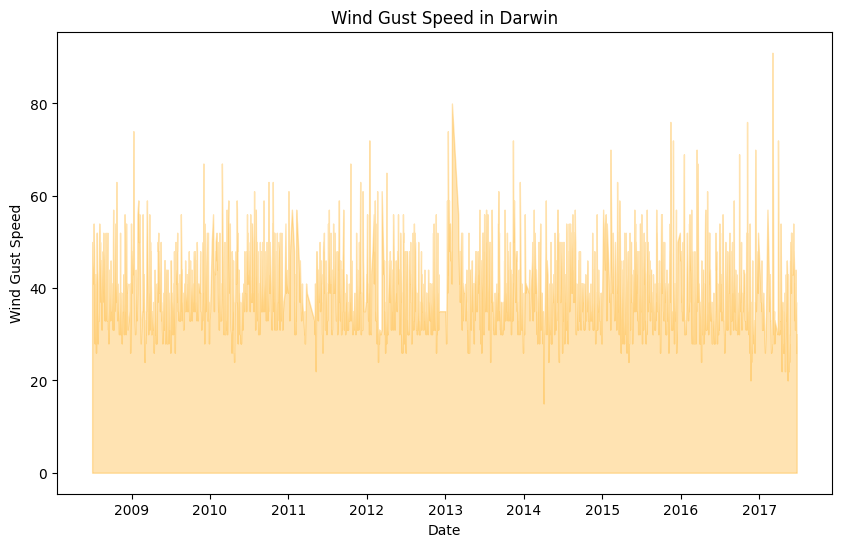

In [718]:
# filter the dataframe for a specific location
location = 'Darwin'
filtered_df = df[df['Location'] == location]

# convert the 'Date' column to datetime type
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# set the 'Date' column as the index
filtered_df.set_index('Date', inplace=True)

# plot Rainfall
plt.figure(figsize=(10, 6))
plt.fill_between(filtered_df.index, filtered_df['Rainfall'], color='blue', alpha=0.3)
plt.title('Rainfall in {}'.format(location))
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()

# plot Evaporation
plt.figure(figsize=(10, 6))
plt.fill_between(filtered_df.index, filtered_df['Evaporation'], color='green', alpha=0.3)
plt.title('Evaporation in {}'.format(location))
plt.xlabel('Date')
plt.ylabel('Evaporation')
plt.show()

# plot WindGustSpeed
plt.figure(figsize=(10, 6))
plt.fill_between(filtered_df.index, filtered_df['WindGustSpeed'], color='orange', alpha=0.3)
plt.title('Wind Gust Speed in {}'.format(location))
plt.xlabel('Date')
plt.ylabel('Wind Gust Speed')
plt.show()

Location with the highest number of FreezingDays: MountGinini (1199 days)
Location with the highest number of ColdDays: Portland (956 days)
Location with the highest number of NormalDays: NorfolkIsland (1704 days)
Location with the highest number of WarmDays: Cairns (1226 days)
Location with the highest number of HotDays: Darwin (1938 days)


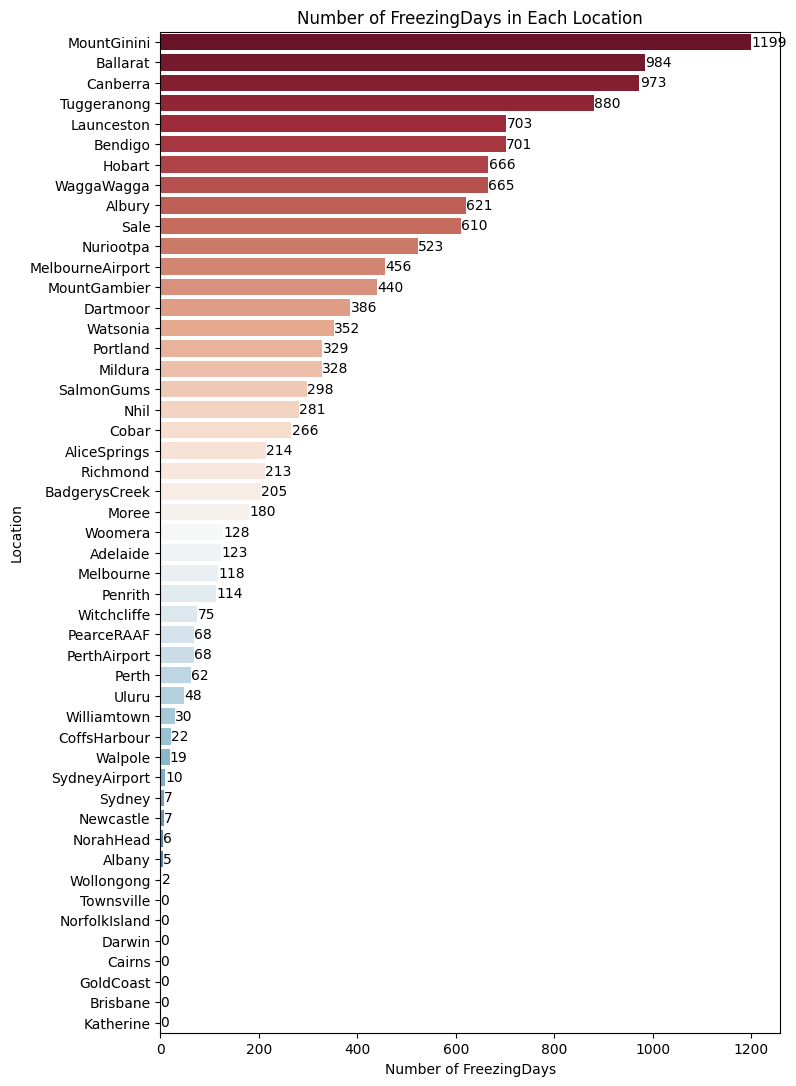

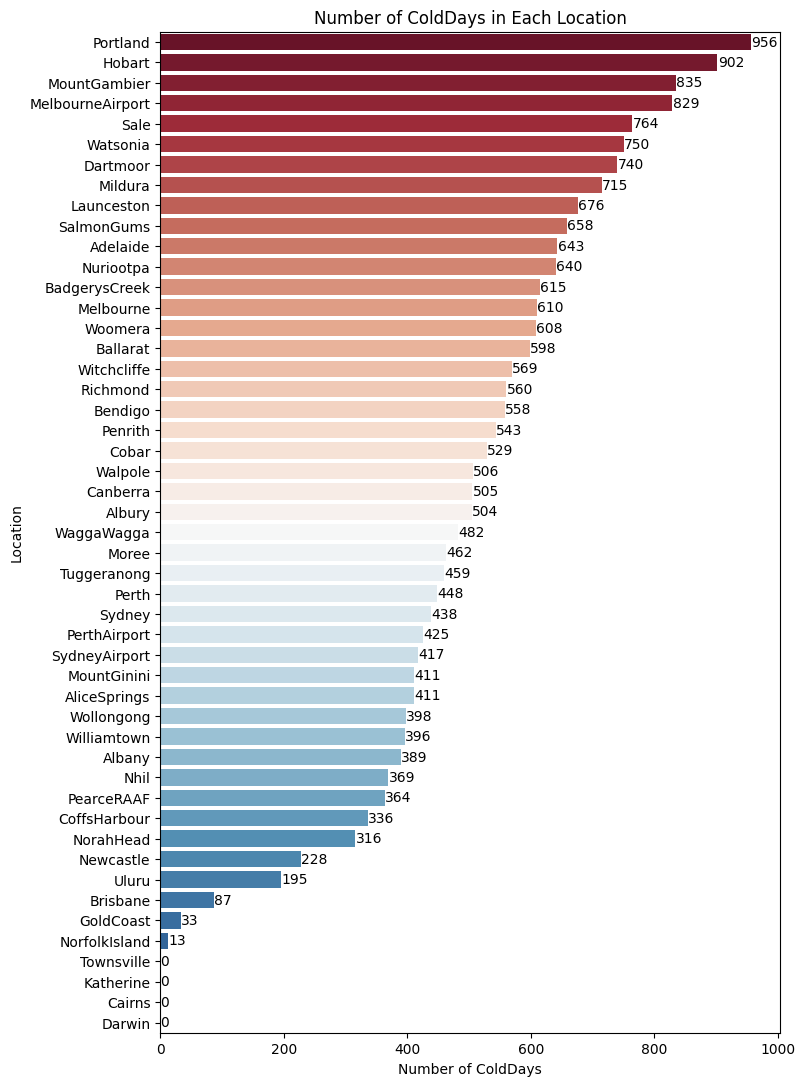

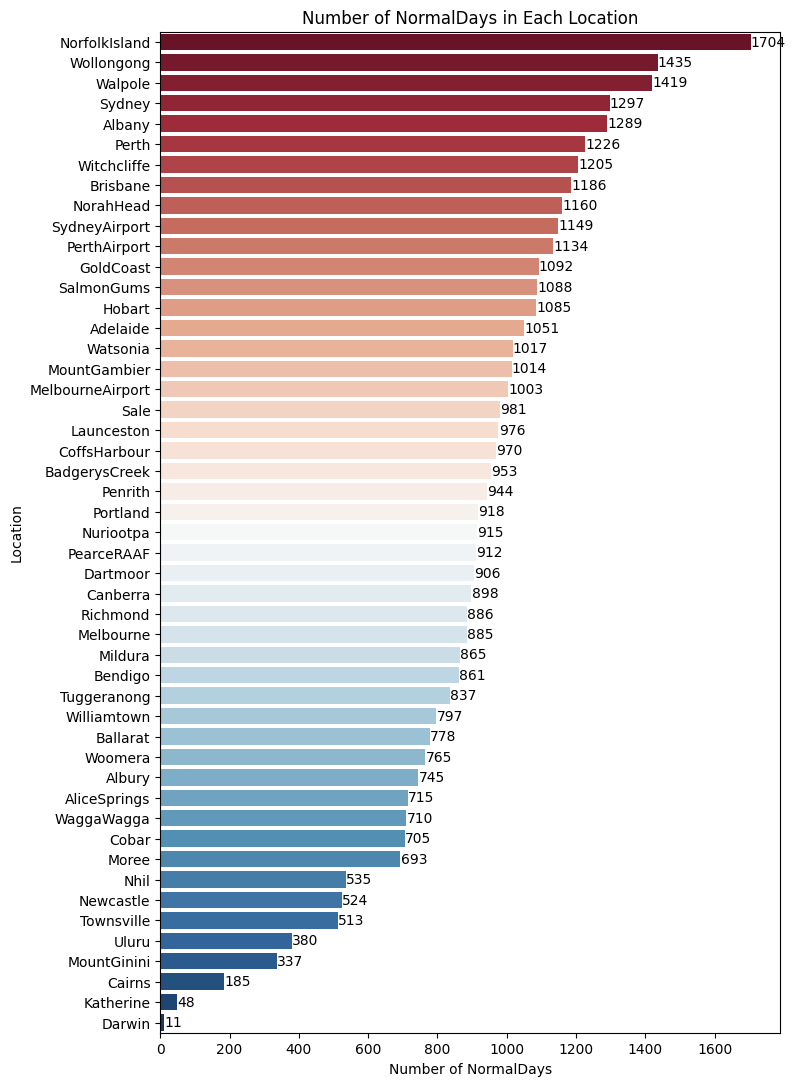

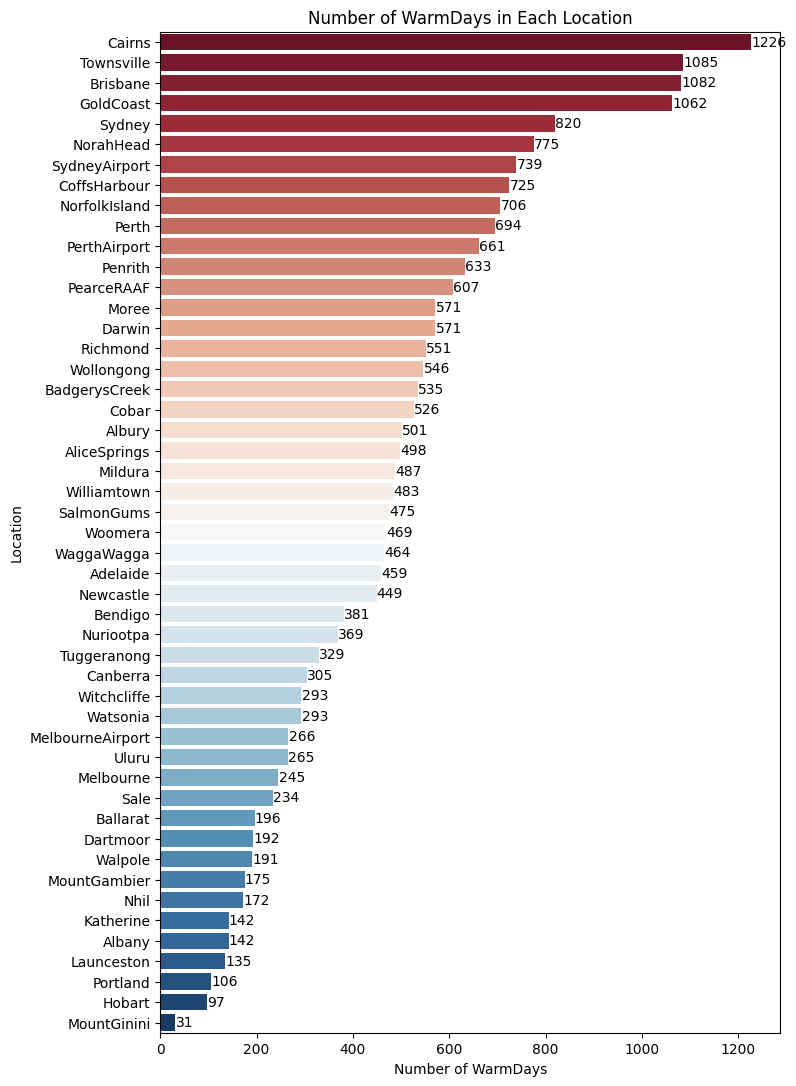

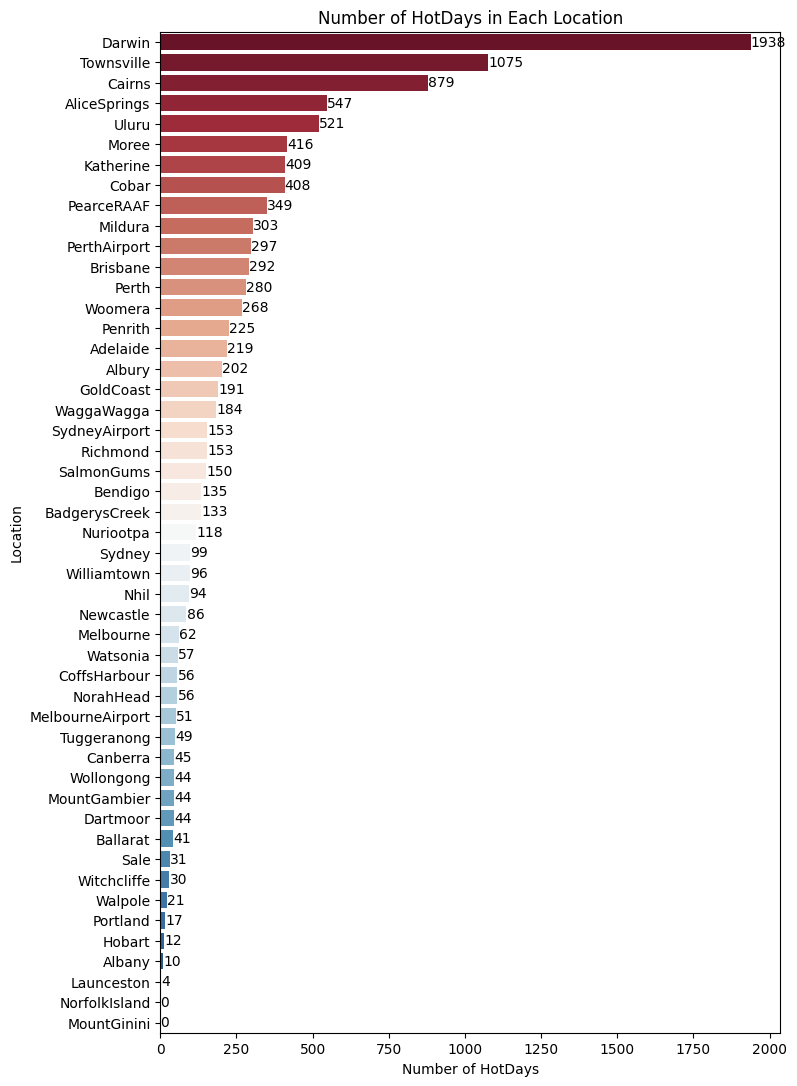

In [719]:
# calculate mean of MinTemp and MaxTemp and add to df
df['MeanTemp'] = (df['MinTemp'] + df['MaxTemp']) / 2

# specify quartiles and categories for categrization
quartiles = df['MeanTemp'].quantile([0, 0.1, 0.3, 0.7, 0.9, 1]).tolist()
categories = ['FreezingDays', 'ColdDays', 'NormalDays', 'WarmDays', 'HotDays']

# categorize temprature values
df['TempCategory'] = pd.cut(df['MeanTemp'], bins=quartiles, labels=categories)
category_counts = df.groupby(['Location', 'TempCategory']).size().unstack(fill_value=0)

# find highest days in each category and print it
highest_counts = category_counts.idxmax()
for category in categories:
    location = highest_counts[category]
    count = category_counts.loc[location, category]
    print(f"Location with the highest number of {category}: {location} ({count} days)")

# plot bar chart for each category using seaborn
for cat in categories:
    org_df = category_counts[[cat]].sort_values(cat, ascending=False).reset_index()
    plt.figure(figsize=(8, 13))

    ax = sns.barplot(x=cat, y='Location', data=org_df, order=org_df['Location'], palette='RdBu')
    plt.xlabel(f'Number of {cat}')
    plt.ylabel('Location')
    plt.title(f'Number of {cat} in Each Location')

# Add text annotations to the bars
    for i, bar in enumerate(ax.patches):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{org_df[cat].iloc[i]}', ha='left', va='center')

plt.show()

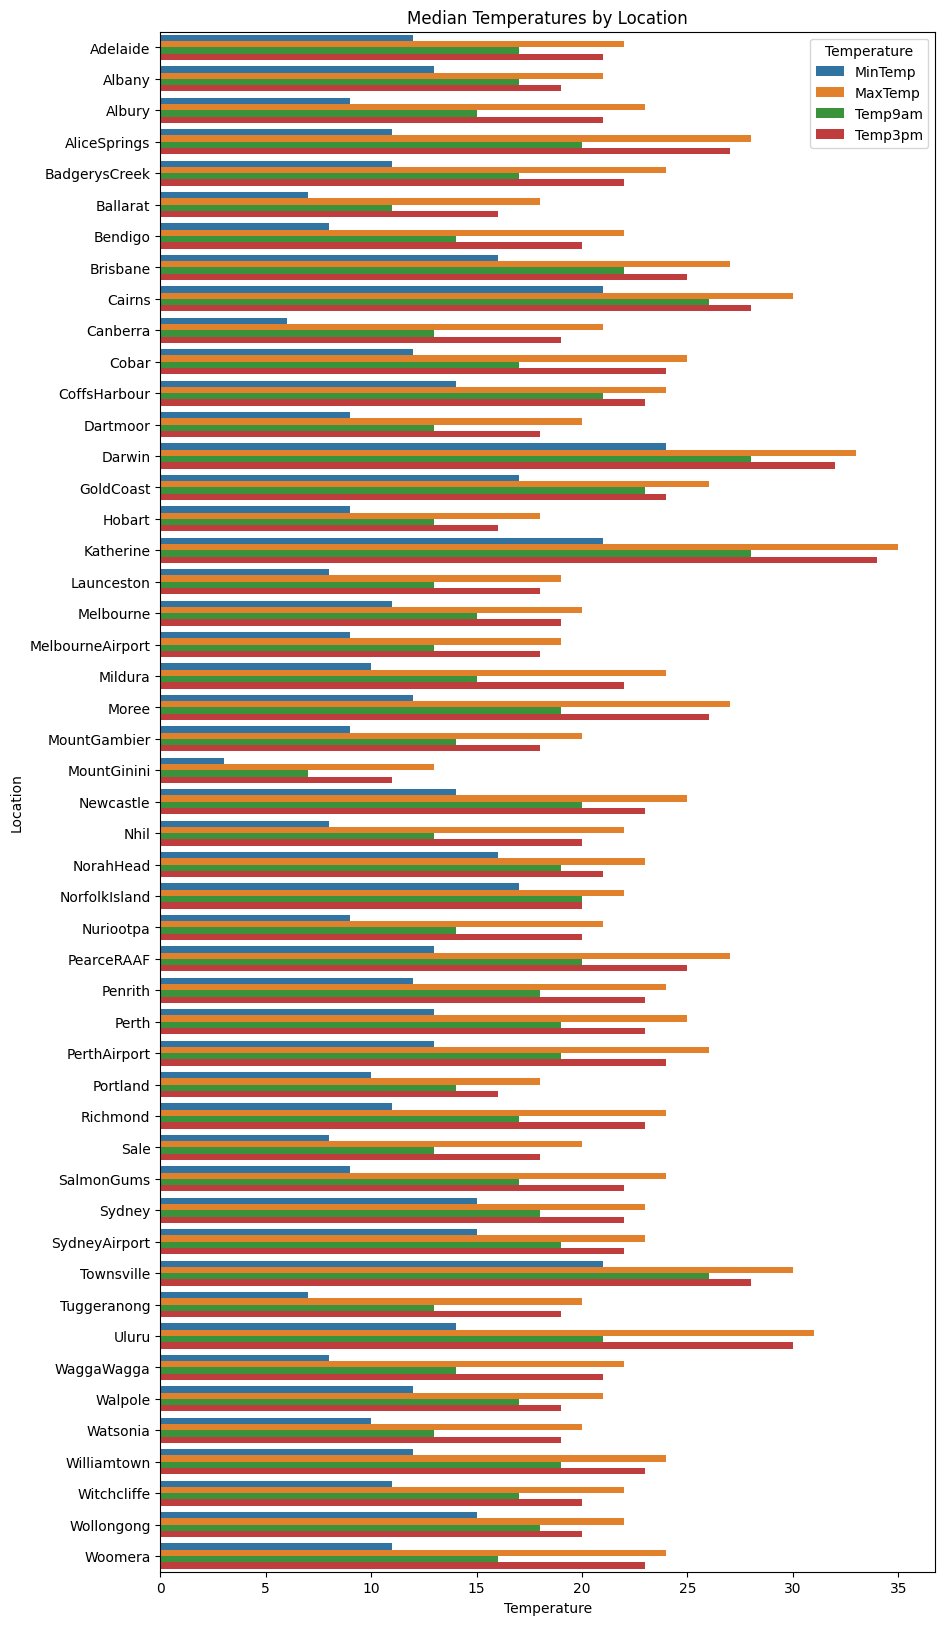

In [720]:
# create dataframe of temp features
temp_df = df[['Location', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']]

# calculate median of each feature in sprcific location
median_temp = temp_df.groupby('Location').median().reset_index()

# use melt to transform dataframe from wide to long
melted_df = pd.melt(median_temp, id_vars='Location', var_name='Temperature', value_name='TempValue')

# plot figure using seaborn
plt.figure(figsize=(10, 20))
sns.barplot(x='TempValue', y='Location', hue='Temperature', data=melted_df)
plt.title('Median Temperatures by Location')
plt.xlabel('Temperature')
plt.ylabel('Location')
plt.show()